# Email Spam Classification

## Import Tools

In [8]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/ML Intern/New folder (2)/archive (9)/spam.csv")

In [4]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
# Data preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]  # Remove stop words
    stemmer = PorterStemmer()
    stemmed_text = [stemmer.stem(word) for word in filtered_text]  # Stemming
    return " ".join(stemmed_text)

In [16]:
df['Cleaned_Message'] = df['Message'].apply(preprocess_text)

In [17]:
# Exploratory Data Analysis
ham_messages = df[df['Category'] == 'ham']['Cleaned_Message']
spam_messages = df[df['Category'] == 'spam']['Cleaned_Message']

In [18]:
# Calculate word frequency
ham_word_freq = Counter(" ".join(ham_messages).split())
spam_word_freq = Counter(" ".join(spam_messages).split())

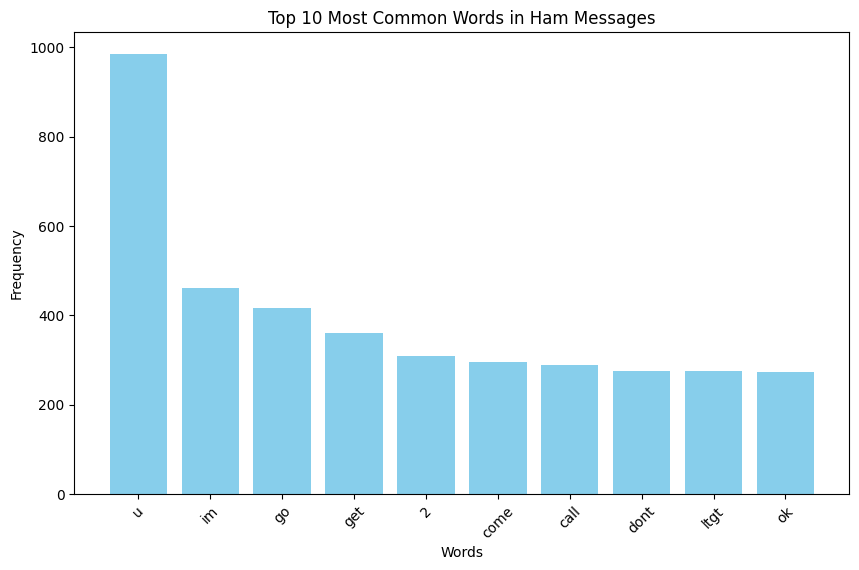

In [19]:
# Plot word frequency for ham messages
ham_word_freq_df = pd.DataFrame(ham_word_freq.most_common(10), columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
plt.bar(ham_word_freq_df['Word'], ham_word_freq_df['Frequency'], color='skyblue')
plt.title('Top 10 Most Common Words in Ham Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

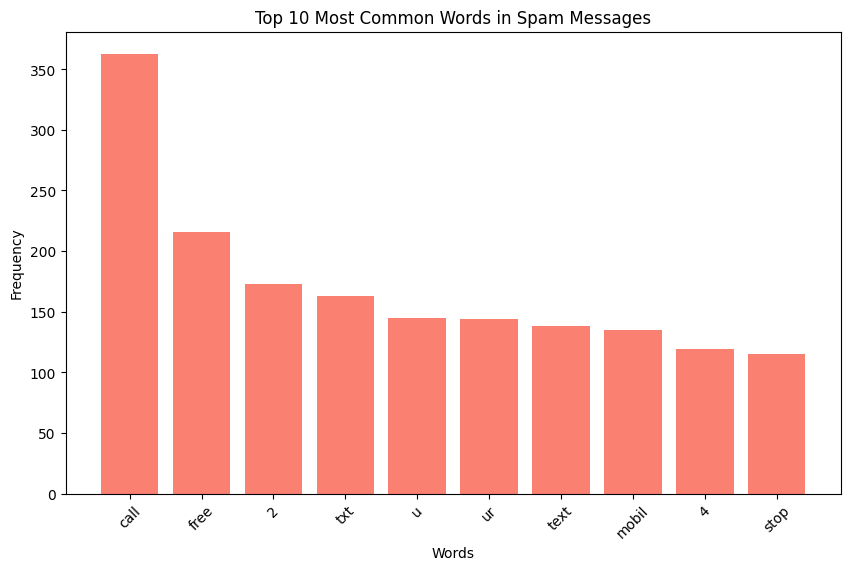

In [20]:
# Plot word frequency for spam messages
spam_word_freq_df = pd.DataFrame(spam_word_freq.most_common(10), columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
plt.bar(spam_word_freq_df['Word'], spam_word_freq_df['Frequency'], color='salmon')
plt.title('Top 10 Most Common Words in Spam Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Tokenization and Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Message'])
y = df['Category']

In [22]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9542600896860987


In [25]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       0.99      0.66      0.80       149

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115



In [27]:
# Print actual vs. predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

     Actual Predicted
3245    ham       ham
944     ham       ham
1044    ham       ham
2484    ham       ham
812     ham       ham
...     ...       ...
4264    ham       ham
2439    ham       ham
5556    ham       ham
4205    ham       ham
4293    ham       ham

[1115 rows x 2 columns]


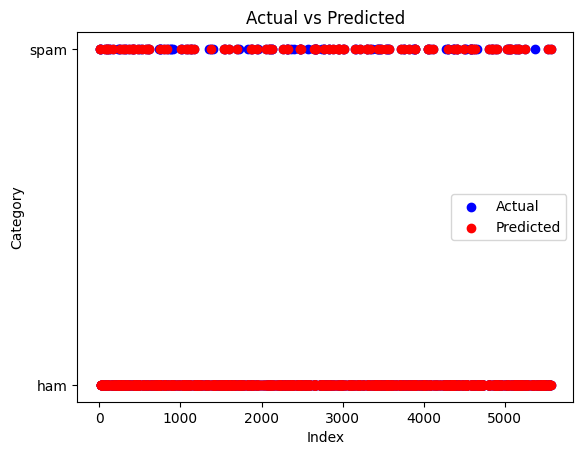

In [26]:
# Actual vs Predicted
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot
plt.scatter(actual_vs_predicted.index, actual_vs_predicted['Actual'], color='blue', label='Actual')
plt.scatter(actual_vs_predicted.index, actual_vs_predicted['Predicted'], color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Category')
plt.legend()
plt.show()